In [1]:
library(quantmod)

Warning message:
"package 'quantmod' was built under R version 4.0.5"
Loading required package: xts

Warning message:
"package 'xts' was built under R version 4.0.5"
Loading required package: zoo

Warning message:
"package 'zoo' was built under R version 4.0.5"

Attaching package: 'zoo'


The following objects are masked from 'package:base':

    as.Date, as.Date.numeric


Loading required package: TTR

Warning message:
"package 'TTR' was built under R version 4.0.5"
Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 



In [71]:
name_of_stock <- 'IOC.NS'
days_history <- 5*365

In [72]:
stock_data <- getSymbols(name_of_stock,from=Sys.Date()-days_history,env=NULL)
close_data <- Cl(stock_data)

Warning message:
"IOC.NS contains missing values. Some functions will not work if objects contain missing values in the middle of the series. Consider using na.omit(), na.approx(), na.fill(), etc to remove or replace them."


In [73]:
tail(close_data)

           IOC.NS.Close
2021-08-26       105.60
2021-08-27       105.95
2021-08-30       107.35
2021-08-31       110.85
2021-09-01       110.75
2021-09-02       110.15

In [74]:
stock_log <- log(close_data)
head(stock_log, n = 10)

           IOC.NS.Close
2016-09-06     4.964940
2016-09-07     4.955034
2016-09-08     4.948494
2016-09-09     4.948139
2016-09-12     4.928973
2016-09-14     4.951593
2016-09-15     4.939497
2016-09-16     4.959693
2016-09-19     4.961358
2016-09-20     4.960219

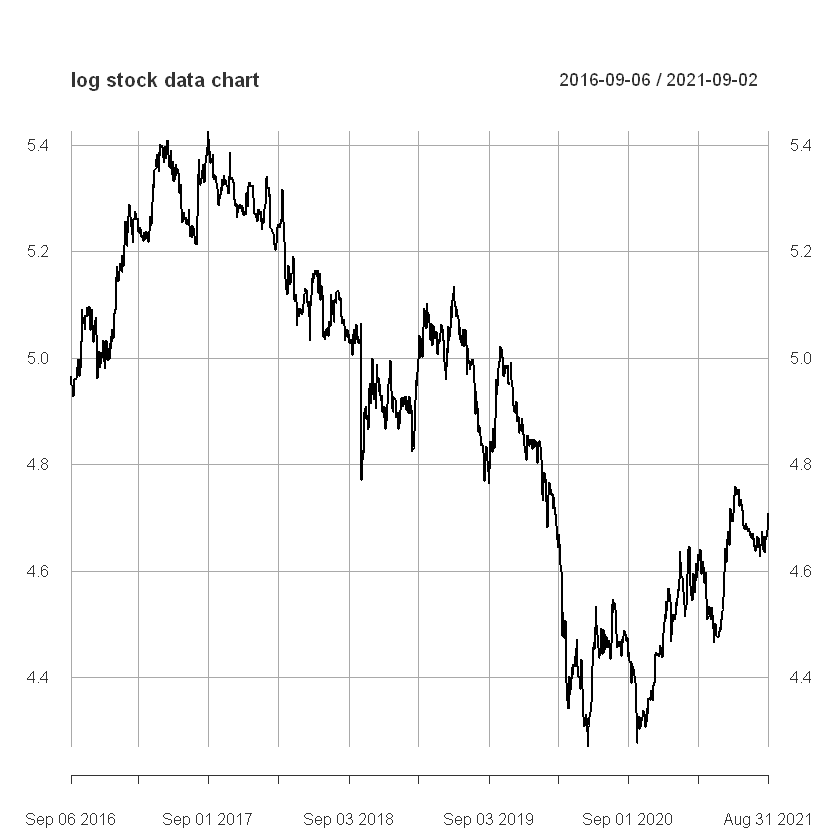

In [75]:
plot(stock_log, main = "log stock data chart")

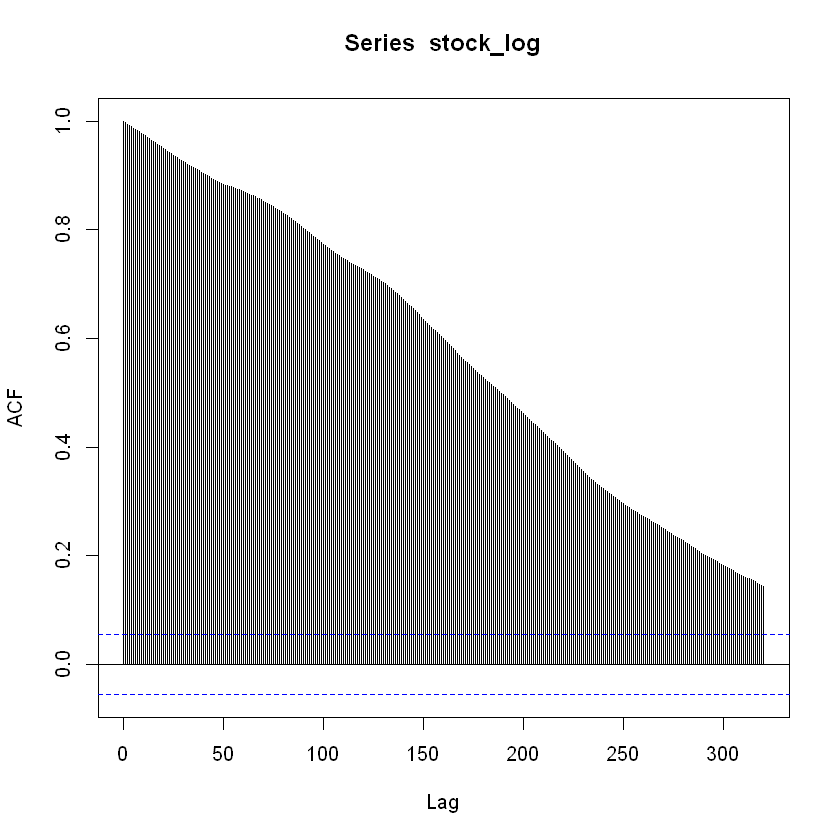

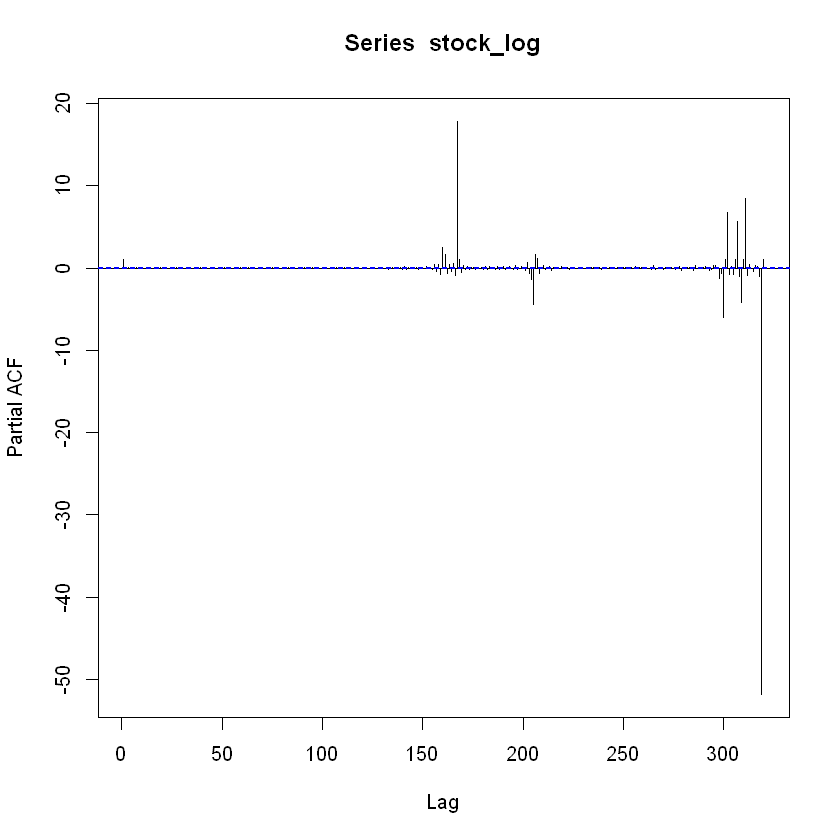

In [76]:
acf_log <- acf(stock_log, lag.max = 320, na.action=na.pass)
pacf_log <- pacf(stock_log, lag.max = 320,na.action=na.pass)

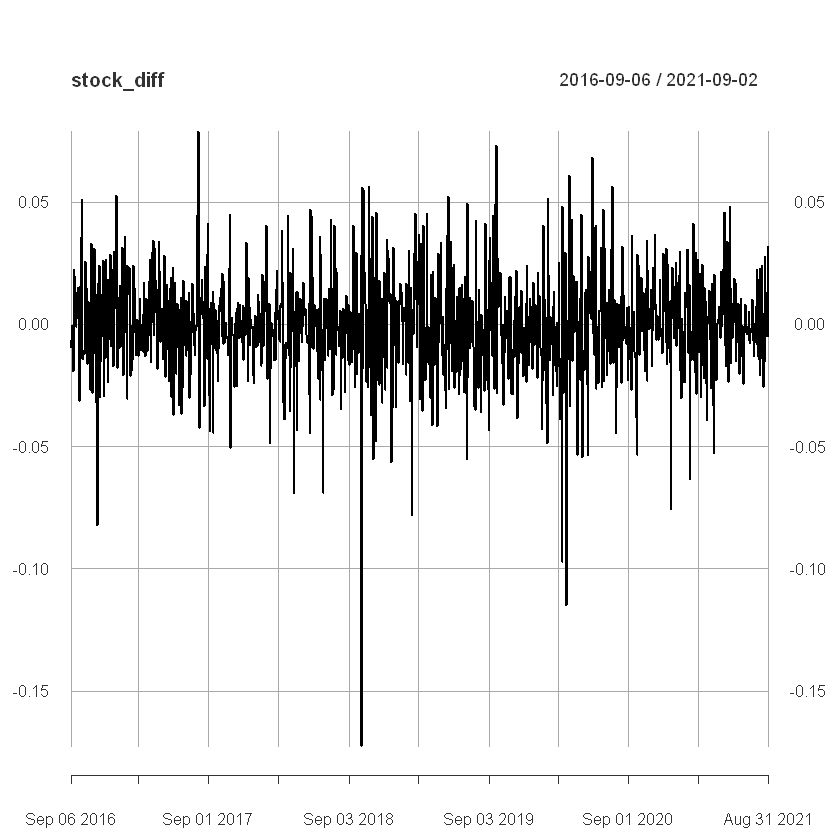

In [77]:
stock_diff <- diff(stock_log, lag = 1)

stock_diff <- na.locf(stock_diff, na.rm = TRUE,
                     fromLast = TRUE)
plot(stock_diff)

In [13]:
library(tseries)

Warning message:
"package 'tseries' was built under R version 4.0.5"


In [79]:
stock_log <- na.locf(stock_log,na.rm=T,from=T)

In [80]:
adf <- adf.test(stock_log, alternative = c("stationary", "explosive"),
                k = 0)
adf


	Augmented Dickey-Fuller Test

data:  stock_log
Dickey-Fuller = -2.6467, Lag order = 0, p-value = 0.3046
alternative hypothesis: stationary


In [81]:
adf_diff <- adf.test(stock_diff, alternative = c("stationary", "explosive"), 
                k = 0)

Warning message in adf.test(stock_diff, alternative = c("stationary", "explosive"), :
"p-value smaller than printed p-value"


In [82]:
adf_diff


	Augmented Dickey-Fuller Test

data:  stock_diff
Dickey-Fuller = -34.683, Lag order = 0, p-value = 0.01
alternative hypothesis: stationary


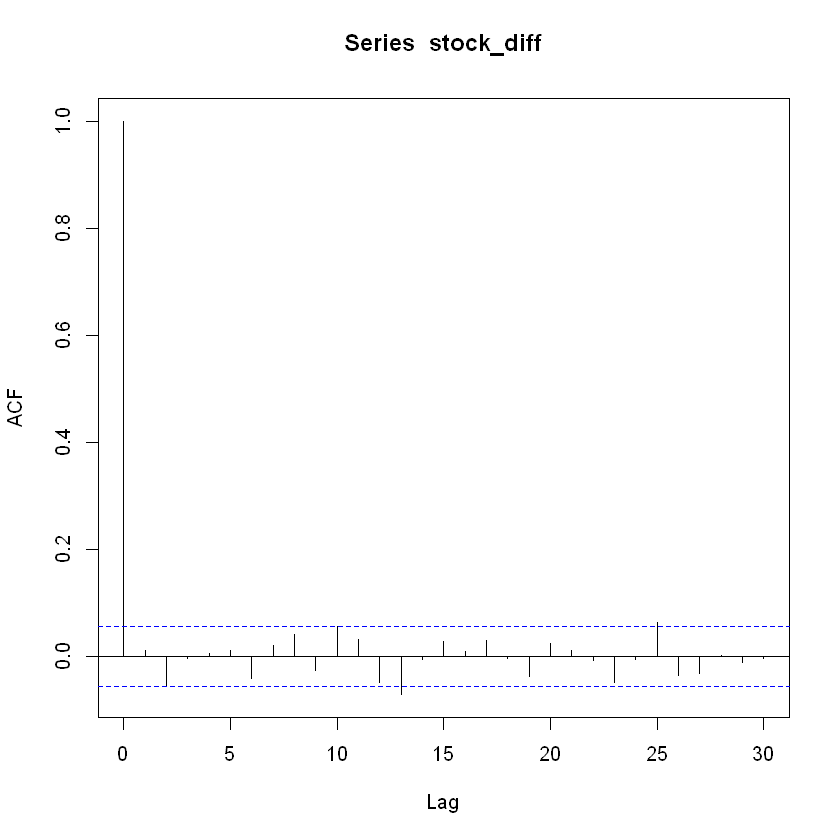

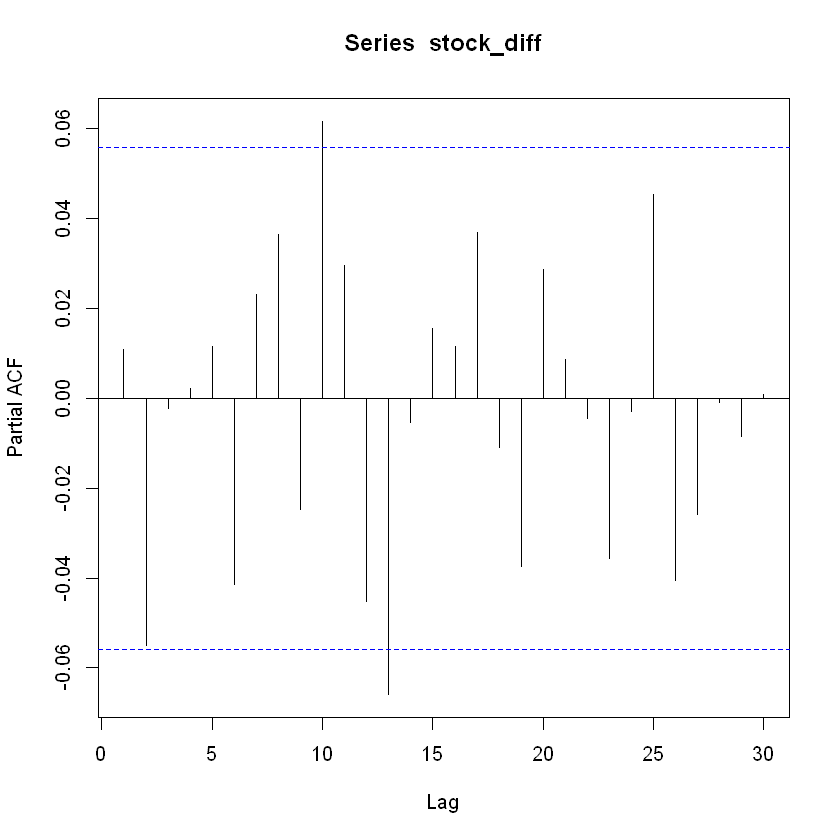

In [83]:
diff.acf <- acf(stock_diff)
diff.pacf <- pacf(stock_diff)

In [25]:
library(caTools)

Warning message:
"package 'caTools' was built under R version 4.0.5"


In [84]:
nrow(stock_diff)

[1] 1233

In [85]:
train_data <- stock_diff[1:1220]

In [29]:
library(forecast)


Warning message:
"package 'forecast' was built under R version 4.0.5"
Registered S3 methods overwritten by 'tibble':
  method     from  
  format.tbl pillar
  print.tbl  pillar



In [86]:
set.seed(123)
arima_model <- auto.arima(train_data, stationary = TRUE, ic = c("aicc", "aic", "bic"), 
                          trace = TRUE)


 Fitting models using approximations to speed things up...

 ARIMA(2,0,2) with non-zero mean : Inf
 ARIMA(0,0,0) with non-zero mean : -5971.252
 ARIMA(1,0,0) with non-zero mean : -5968.598
 ARIMA(0,0,1) with non-zero mean : -5969.402
 ARIMA(0,0,0) with zero mean     : -5973.094
 ARIMA(1,0,1) with non-zero mean : -5969.368

 Now re-fitting the best model(s) without approximations...

 ARIMA(0,0,0) with zero mean     : -5973.094

 Best model: ARIMA(0,0,0) with zero mean     



In [87]:
summary(arima_model)

Series: train_data 
ARIMA(0,0,0) with zero mean 

sigma^2 estimated as 0.000437:  log likelihood=2987.55
AIC=-5973.1   AICc=-5973.09   BIC=-5967.99

Training set error measures:
                        ME       RMSE        MAE MPE MAPE      MASE       ACF1
Training set -0.0002432936 0.02090538 0.01502594 100  100 0.6959055 0.01079859


	Ljung-Box test

data:  Residuals from ARIMA(0,0,0) with zero mean
Q* = 12.983, df = 10, p-value = 0.2246

Model df: 0.   Total lags used: 10



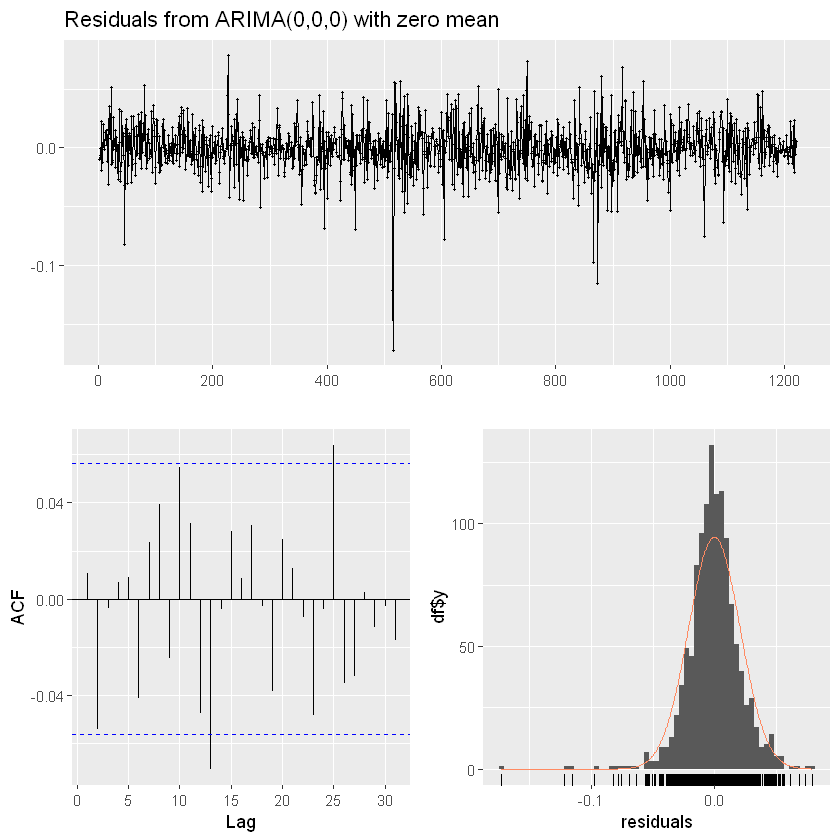

In [88]:
checkresiduals(arima_model)

In [89]:
arima <- arima(train_data, order = c(0, 0, 0))
summary(arima)


Call:
arima(x = train_data, order = c(0, 0, 0))

Coefficients:
      intercept
         -2e-04
s.e.      6e-04

sigma^2 estimated as 0.000437:  log likelihood = 2987.63,  aic = -5971.26

Training set error measures:
                        ME       RMSE        MAE MPE MAPE      MASE       ACF1
Training set -1.329842e-15 0.02090396 0.01502416 Inf  Inf 0.6958227 0.01079859

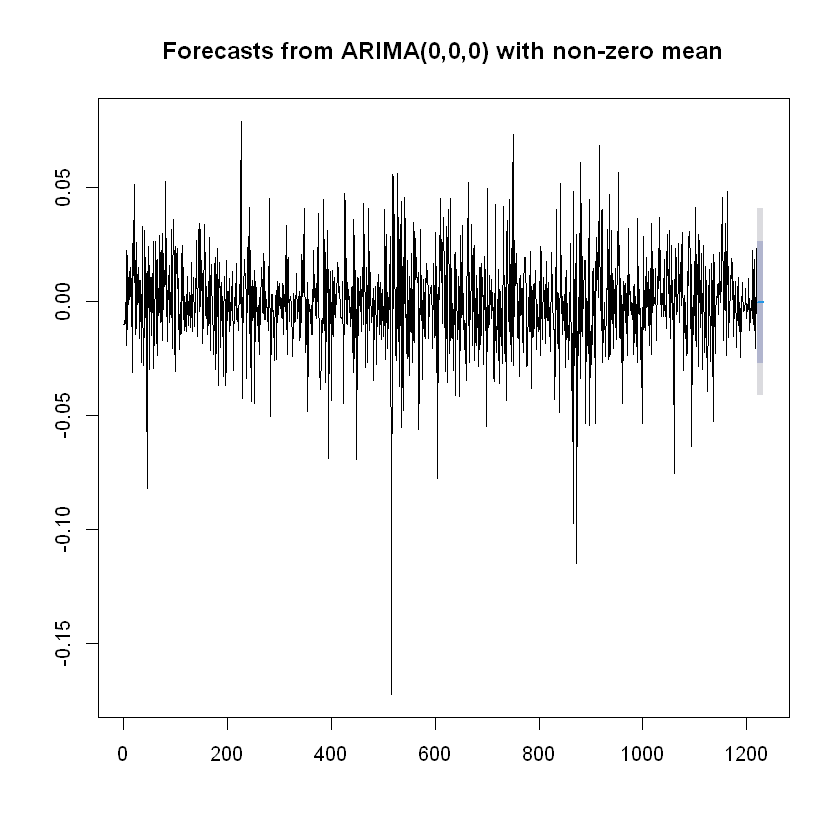

In [90]:
forecast1 <- forecast(arima, h = 13)
plot(forecast1)


	Ljung-Box test

data:  Residuals from ARIMA(0,0,0) with non-zero mean
Q* = 12.983, df = 9, p-value = 0.1634

Model df: 1.   Total lags used: 10



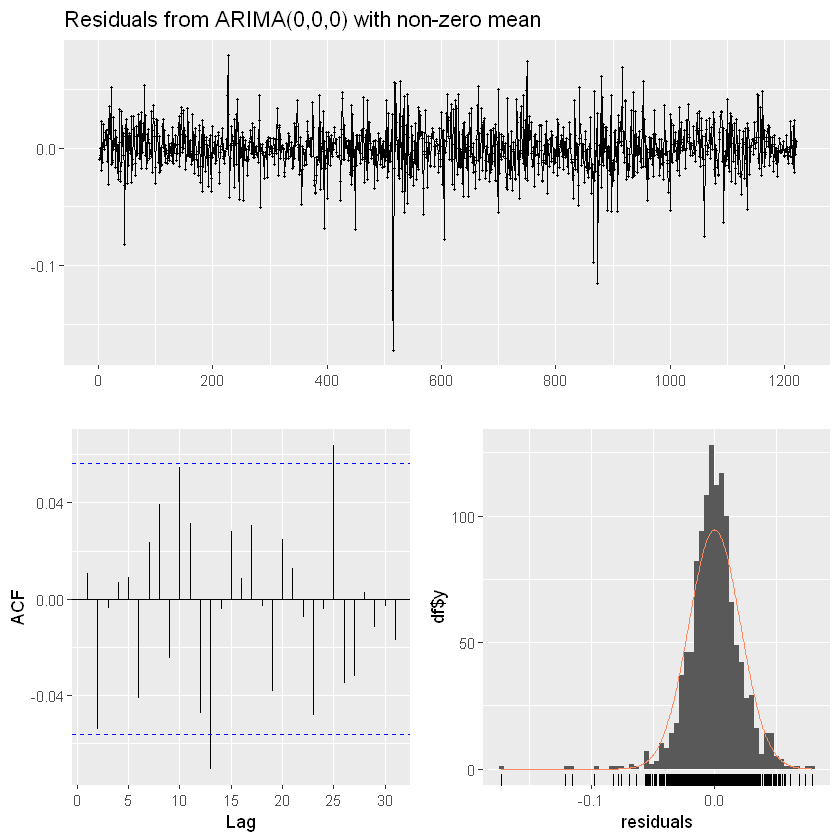

In [91]:
checkresiduals(arima)

In [92]:
nrow(stock_log)

[1] 1233

In [93]:
arima <- arima(stock_log[1:1230], order = c(0, 1, 0))
summary(arima)


Call:
arima(x = stock_log[1:1230], order = c(0, 1, 0))


sigma^2 estimated as 0.0004353:  log likelihood = 3011.97,  aic = -6021.93

Training set error measures:
                        ME       RMSE        MAE         MPE      MAPE
Training set -0.0002307975 0.02085696 0.01497854 -0.00571966 0.3072573
                  MASE        ACF1
Training set 0.9994563 0.008405258

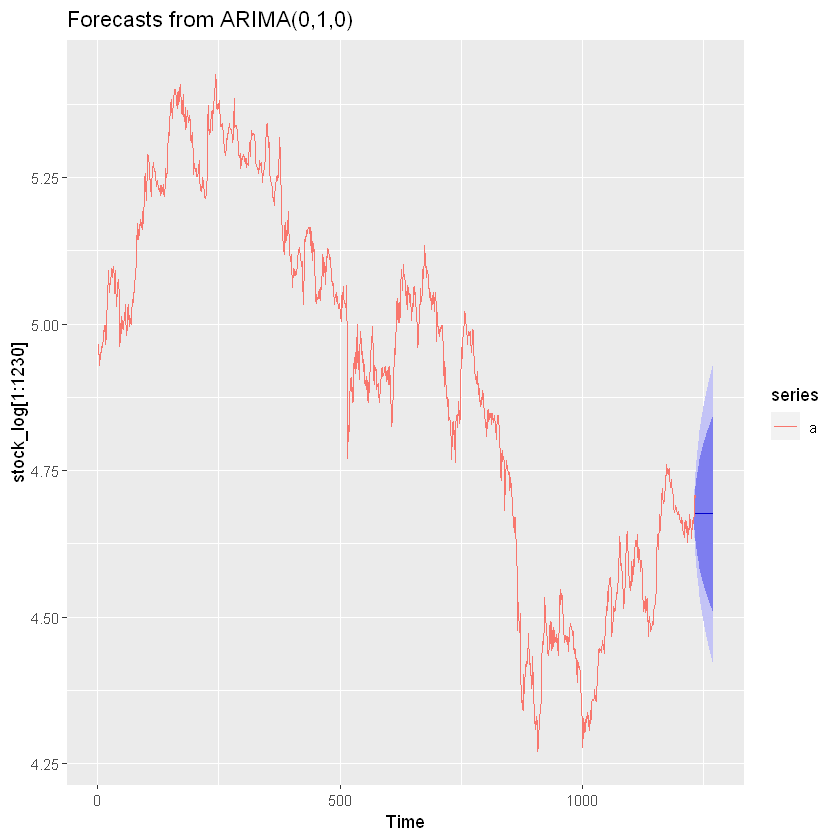

In [94]:
forecast_ori <- forecast(arima, h = 40)
a <- ts(stock_log)
forecast_ori %>% autoplot() + autolayer(a)

In [95]:
tail(stock_log)

           IOC.NS.Close
2021-08-26     4.659658
2021-08-27     4.662967
2021-08-30     4.676095
2021-08-31     4.708178
2021-09-01     4.707275
2021-09-02     4.701843

In [96]:
tail(forecast_ori)

,80%,95%
1231,4.649355,4.635200
1232,4.638279,4.618261
1233,4.629780,4.605263
1234,4.622615,4.594305
1235,4.616303,4.584651
1236,4.610596,4.575924
1237,4.605348,4.567898
1238,4.600464,4.560427
1239,4.595876,4.553411
1240,4.591537,4.546775


In [97]:
lower <- sapply(forecast_ori$lower,exp)

In [98]:
head(lower,13)

80%,95%
104.51755,103.04852
103.36631,101.31767
102.49154,100.00929
101.75983,98.91940
101.11951,97.96904
100.54409,97.11770
100.01782,96.34135
99.53046,95.62432
99.07488,94.95573
98.64590,94.32767


In [99]:
upper <- sapply(forecast_ori$upper,exp)

In [100]:
head(upper,19)

80%,95%
110.2592,111.8310
111.4872,113.7415
112.4388,115.2295
113.2473,116.4991
113.9644,117.6292
114.6166,118.6604
115.2197,119.6166
115.7839,120.5135
116.3163,121.3620
116.8221,122.1701


In [103]:
as.data.frame(upper)

80%,95%
<dbl>,<dbl>
110.2592,111.8310
111.4872,113.7415
112.4388,115.2295
113.2473,116.4991
113.9644,117.6292
114.6166,118.6604
115.2197,119.6166
115.7839,120.5135
116.3163,121.3620
